In [1]:
import nltk
%matplotlib inline
nltk.download("punkt")
nltk.download("cmudict")

import sys
import streamlit as st
import os
import pandas as pd
import pickle
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import copy
import streamlit as st
import math
import scipy
import plotly.graph_objects as go
import shelve
import plotly.express as px
import pandas as pd
from random import sample
import click
from scipy.stats import pearsonr
from science_access.t_analysis import not_want_list

not_want_list.extend(
    ["link", "librarian", "issue", "abstract", "science", "cookie", "publication"]
)

from science_access.online_app_backend import call_from_front_end
from science_access.online_app_backend import ar_manipulation
from science_access.t_analysis import text_proc
from science_access.online_app_backend import semantic_scholar_alias



from science_access.enter_author_name import (
    art_cloud,
    create_giant_strings,
    art_cloud_wl,
    zipf_plot,
)
from science_access.enter_author_name import (
    distribution_plot_from_scrape,
    grand_distribution_plot,
    data_frames_from_scrape,
)
from science_access.enter_author_name import (
    push_frame_to_screen,
    fast_art_cloud,
    grab_data_for_splash,
)
from science_access.enter_author_name import (
    frame_to_lists,
    try_and_update_cache,
    extra_options,
)
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /home/user/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/home/user/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [4]:
author_name="Brian H Smith"
def do_science(author_name):
    ar = call_from_front_end(author_name, tns=10, fast=True)
    author = pd.DataFrame(ar)
    fig = plt.figure()
    plt.scatter(list(range(0,len(author["numCitedBy"]))),author["numCitedBy"],label="citedby")
    plt.scatter(list(range(0,len(author["numCitedBy"]))),author["standard"],label="readability")
    plt.legend()
    plt.show()
    corr, _ = pearsonr(author["numCitedBy"], author["standard"])
    print('Pearsons correlation: %.3f' % corr)
    fig = plt.figure()
    plt.scatter(author["standard"],author["numCitedBy"],label="citedby")
    plt.show()

    return (author["numCitedBy"],author["standard"])


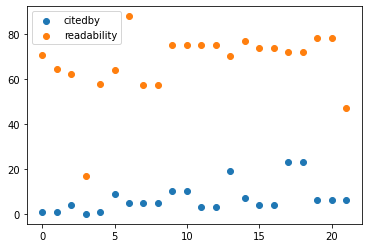

Pearsons correlation: 0.267


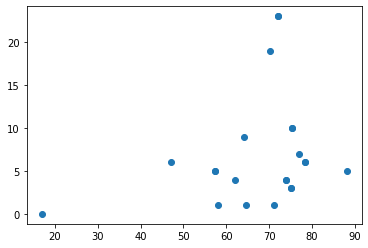

In [5]:
author_name="Brian H Smith"
(author_numCitedBy,author_standard) = do_science(author_name)

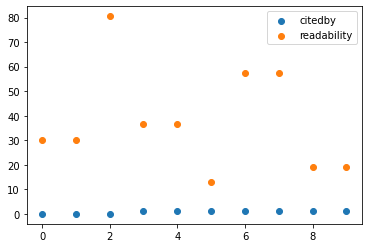

Pearsons correlation: -0.288


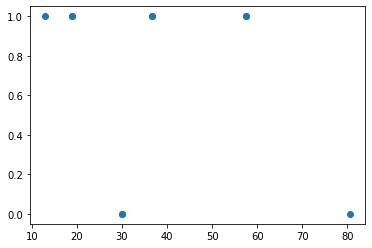

In [6]:
author_name="Patrick McGurrin"
(author_numCitedBy,author_standard) = do_science(author_name)

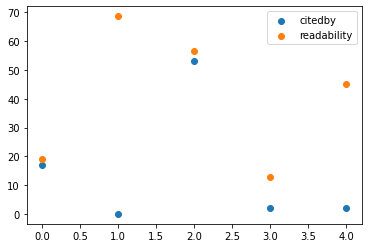

Pearsons correlation: 0.207


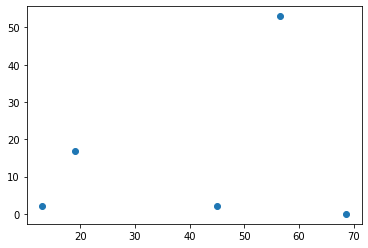

In [7]:
author_name="Brian Usher"
(author_numCitedBy,author_standard) = do_science(author_name)

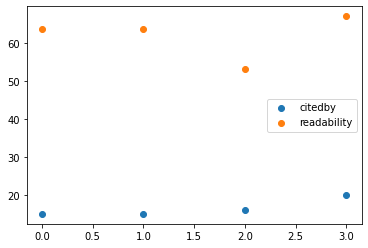

Pearsons correlation: 0.399


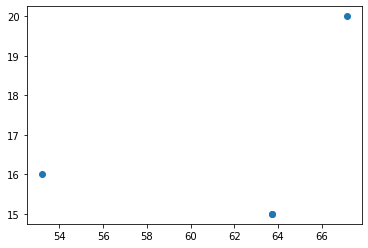

In [8]:
author_name="Bradley Lusk"
(author_numCitedBy,author_standard) = do_science(author_name)

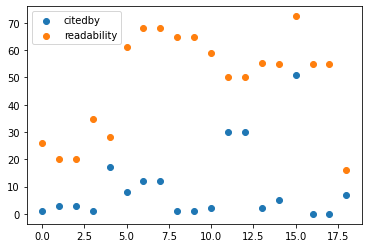

Pearsons correlation: 0.264


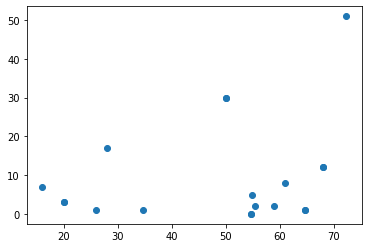

In [9]:
author_name="Thomas Close"
(author_numCitedBy,author_standard) = do_science(author_name)